# Introductory applied machine learning
# Assignment 4: Unsupervised Learning Part A (KMeans Clustering) [50%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 4 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part A of Assignment 4 and deals with the News-Group Dataset - Part B deals with the MNIST dataset. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 22/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook for Part A, *and*
 1. The Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:
1. Fill out this notebook (as well as Part B), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.
   
1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 04_A_KMeans.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_A_KMeans.ipynb
    scp -r [FULL PATH TO 04_B_PCA.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_B_PCA.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Both Part A (this notebook) and Part B are each worth 50% of the Total Mark for Assignment 4.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [2]:
%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# For Getting the Data
from sklearn.datasets import fetch_20newsgroups, load_digits
from sklearn.feature_extraction.text import TfidfVectorizer

# System functionality
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from utils.plotter import plot_voronoi

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:

Populating the interactive namespace from numpy and matplotlib


/Users/liuwenyang/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset

In this part of the assignment we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

### Description of the Data

This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)) for each word instead of the frequency counts (which is why we will be downloading it anew). These weights represent the importance of a word to a document with respect to a collection of documents. The importance increases proportionally to the number of times a word appears in the document and decreases proportionally to the number of times the word appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that appear in more than two documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words). We have provided the code for this preprocessing for you.

## 1. Exploration of the dataset

Instead of providing the data as a dataset, we are going to import the data from the sklearn library. Make sure you have an active internet connection and run the cell below to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.19/datasets/index.html#the-20-newsgroups-text-dataset)).

**Do not change any of the code in this cell.**

*This may take a wee while as it needs to download the dataset and preprocess it.*

In [3]:
# Load the Data with only the required categories
cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'), data_home='./datasets')
# Transform Data to TF-IDF and store in X/y
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X = pd.DataFrame(vectorizer.fit_transform(newsgroups_train.data).todense(), 
                 columns=vectorizer.get_feature_names())
y = pd.Series(np.array(cats)[newsgroups_train.target])

### ========== Question 1.1 --- [10 marks] ==========

As usual we start with an initial inspection of the data. 

&nbsp;&nbsp;**(a)** [Code] Using suitable pandas/numpy methods, summarise the key properties of the data (variables `X` and `y`). This should be no more than a few lines of code.<br>
&nbsp;&nbsp;**(b)** [Text] Comment on your observations from ***(a)*** (dimensionality, data ranges, anything out of the ordinary). Be sure to indicate what `X` and `y` are (data type and purpose). (<5 sentences)<br>
&nbsp;&nbsp;**(c)** [Text] Why do you think it is useful to consider TF-IDF weights as opposed to just the frequency of times a word appears in a document as a feature? (1 or 2 sentences)

In [5]:
# (a) # Your Code goes here:
print(X.describe())
print(X.shape)
print(X.head())
print(y.shape)
print(y[0:10])

               abc      ability         able           ac       accept  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.002436     0.002149     0.006709     0.001454     0.002286   
std       0.030224     0.020739     0.034631     0.023100     0.021634   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.723914     0.420916     0.431380     0.519765     0.443354   

            access    according     acquired     actually      adaptec  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.003953     0.003115     0.000921     0.008366     0.001816   
std       0.030111     0.026958     0.016275     0.043921     0.026026   
min       0.000000     0.000000     0

(b) ***Your answer goes here:***
X is the features, and have 1000 columns(1000 words), each word represent one feature,and the value of X
is the tf-idf weights of each word. each row represent the features in one article
y is the target label of X, each row means the type of the article

(c) ***Your answer goes here:***
If you simply use the frequency of times, then the weight of some high-frequency words will be even greater.
TF-IDF tends to filter out common words and retain important words

## 2. Unsupervised Learning

### ========== Question 2.1 --- [6 marks] ==========

We will now use [K-Means](http://scikit-learn.org/0.19/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) clustering as a means of unsupervised learning of the document classes. Familiarise yourself with the implementation and then answer the following questions.

&nbsp;&nbsp;**(a)** [Text] The KMeans algorithm is non-deterministic. Explain what is meant by this, why this is the case, and how the final model is selected (3 sentences).<br>
&nbsp;&nbsp;**(b)** [Text] One of the parameters we need to specify when using k-means is the number of clusters. What is a reasonable number for this problem and why? *Hint: Look at the `y` values, which are in a Pandas `Series`*.<br>
&nbsp;&nbsp;**(b)** [Code] Create and fit a K-Means model to the training data `X` with your specified number of clusters. For reproducability, set `random_state=1000` -- keep other arguments at default values. Keep track of the k-means object created.

(a) ***Your answer goes here:***
Use this algorithm for the same batch of data, the final result is not necessarily the same Because each initial average is not necessarily the same The final result may be a local optimal solution

(b) ***Your answer goes here:***
because there are five labels of y, so the reasonable number of clusters is 5

In [6]:
#(c) # Your Code goes here:
kmeans = KMeans(n_clusters=5,random_state=1000)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1000, tol=0.0001, verbose=0)

### ========== Question 2.2 --- [6 marks] ==========

We will now evaluate the quality of this fit, primarily through the Adjusted Rand Index (ARI) of the model.

&nbsp;&nbsp;**(a)** [Text] By referring to the [sklearn documentation](http://scikit-learn.org/0.19/modules/clustering.html), describe what the ARI (`adjusted_rand_score`) measures about the quality of the fit. What is a disadvantage of this measure for evaluating clustering performance? (2-3 sentences) <br>
&nbsp;&nbsp;**(b)** [Code] Compute (and display) the Adjusted Rand Index of the fitted model.<br>
&nbsp;&nbsp;**(c)** [Text] Comment (1 or 2 sentences) on the quality of the fit as expressed by this measure.<br>

(a) ***Your answer goes here:***
measures the similarity of the two assignments,The value is between [-1,1],the negative number means the result is not good, the closer to 1 the better. ARI need the ture labels to measures the similarity

In [7]:
#(b) # Your Code goes here:
y_pred = kmeans.predict(X)
ARI = adjusted_rand_score(y_pred,y)
print('Adjusted Rand Index is', ARI)

Adjusted Rand Index is 0.22619332384922217


(c) ***Your answer goes here:***
as I mentioned that the score is the closer to 1 the better.
the score is about 0.2. This score is not particularly satisfactory and it can be improved

### ========== Question 2.3 --- [12 marks] ==========
<a id='question_2_3'></a>
Let us explore the quality of the fit further. We will visualise bar-charts of the fit.

&nbsp;&nbsp;**(a)** [Code] Create a bar-chart of the number of data-points with a particular class assigned to each cluster centre. You should be able to do this in one plot using seaborn functionality. Make sure to distinguish the cluster-centres (using for example grid-lines), and label the plot appropriately. As part of the cluster labels, include the total number of data-points assigned to that cluster. *Hint: it might be useful to specify the image width using `pylab.rcParams['figure.figsize'] = (width, height)` to make things clearer.*<br>
&nbsp;&nbsp;**(b)** [Text] Comment (3 to 4 sentences) on the distribution of datapoints to cluster centres, and how this relates to the ARI measure above.


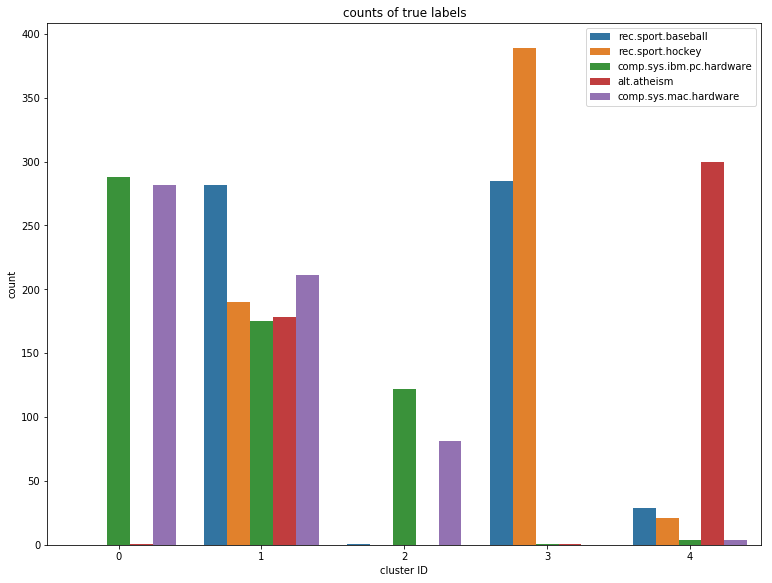

In [8]:
#(a) # Your Code goes here:
plt.figure(figsize=(12.8,9.6))
sns.countplot(x=kmeans.labels_, hue=y)
plt.xlabel("cluster ID")
plt.title("counts of true labels")
plt.legend(fontsize=10)
plt.show()

(b) ***Your answer goes here:***
As can be seen from the figure, only the display of cluster 4 is satisfactory because this cluster represents a relatively independent alt.atheism. Clustering 0, 2 is a clustering of PC and mac, respectively, because the relationship between the two categories is relatively close, so they are gathered together. Cluster 1 contains almost all categories.
So overall, the clustering algorithm does not perform well, and it also matches the ARI score.

### ========== Question 2.4 --- (LEVEL 11) --- [11 marks] ==========

Another way to quantify the quality of the fit is to use the Aggregate Intra-Cluster Distance (this is known as the `inertia` within SKLearn).

&nbsp;&nbsp;**(a)** [Text] Again by referring to the [sklearn documentation](http://scikit-learn.org/0.19/modules/clustering.html), describe what this measure reports. Indicate why it may be less straightforward at judging the quality of the clustering than the ARI. (2 to 3 sentences). <br>
&nbsp;&nbsp;**(b)** [Code] Report the Inertia of the fitted model as well as the mean distance between each data-point and the global mean. Compute also a distance matrix such that the entry with index (i,j) shows the distance between centre i and centre j.<br>
&nbsp;&nbsp;**(c)** [Text] Using the above values, comment on what the Inertia score tells us about the quality of the fit, as well as anything else you can say about the clusters. (2 to 3 sentences)

(a) ***Your answer goes here:***
inertia is used to evaluate whether the number of clusters is appropriate. The smaller the distance, the better the clustering.how,it has two drawbacks one is that clusters are assumpted be convex and isotropic, another is that In high dimensional space, the Euclidean distance will become inflated. just like this case, there are 1000 features

In [9]:
# (b) # Your Code goes here:
inertia = kmeans.inertia_

global_mean_distance = np.mean(np.linalg.norm(X-X.mean(), axis=0))




distances = np.empty((5,5))
for i in range(5):
    for j in range(5):
        distances[i,j] = np.linalg.norm(kmeans.cluster_centers_[i] - kmeans.cluster_centers_[j])


print ("inertia:", inertia)
print ("the global mean distance:",global_mean_distance)
print ("distance matrix: \n",distances)

inertia: 2593.1987614976024
the global mean distance: 1.5568200597012334
distance matrix: 
 [[0.         0.19433337 0.33664139 0.29309652 0.29207231]
 [0.19433337 0.         0.34686978 0.20180761 0.22206859]
 [0.33664139 0.34686978 0.         0.41042362 0.41056195]
 [0.29309652 0.20180761 0.41042362 0.         0.27911886]
 [0.29207231 0.22206859 0.41056195 0.27911886 0.        ]]


(c) ***Your answer goes here:***
The global average distance is 1.55, a total of 2845 rows of data, then the total distance exceeds 4400 without clustering.
Inertia is 2500, which means the algorithm has a certain effect, but the distance of 2500 is not ideal.

### ========== Question 2.5 --- [16 marks] ==========

We will now investigate using [PCA](http://scikit-learn.org/0.19/modules/generated/sklearn.decomposition.PCA.html) dimensionality reduction to try and improve the quality of the fit.

&nbsp;&nbsp;**(a)** [Text] Give one reason why PCA **might** be preferrable in certain cases in reducing dimensionality over just picking a subset of the features.<br>
&nbsp;&nbsp;**(b)** [Code] Pick 10 values in the range [1, ... 1000] inclusive, representing feature-space dimensionality `n`. Use a log-scale to span this range efficiently. For each of these values, reduce the dimensionality of `X` to the respective size (i.e. PCA with `n` components), and then fit a 5-centre KMeans classifier, storing the `adjusted_rand_score` for each dimensionality. *N.B: Set the `random_state=1000` for both PCA and K-Means objects to ensure reproducability.*<br>
&nbsp;&nbsp;**(c)** [Code] Plot the the `adjusted_rand_score` against the number of principal components. **Scale** the axes appropriately to visualise the results, and label the plot.<br>
&nbsp;&nbsp;**(d)** [Text] Comment on the effect dimensionality reduction had on the K-Means clustering and what could give rise to this (2 - 3 sentences).<br>
&nbsp;&nbsp;**(e)** [Code] Fit a 5-cluster K-Means object to the data with the dimensionality that produced the best ARI. In a similar manner to [Question 2.3](#question_2_3), plot a bar-chart of the number of data-points from each class assigned to each cluster. *N.B: Remember to set `random_state=1000` for both PCA and K-Means objects, and label all your diagrams*.<br>
&nbsp;&nbsp;**(f)** [Text] Compare the clustering distribution in **(e)** and in [Question 2.3 **(a)**](#question_2_3). *Hint: comment briefly (1 to 2 sentences) on the distribution of classes*.

(a) ***Your answer goes here:***
When we select features, we don't know if features are key features, which may lead us to lose some of the most important features, which makes the trained models not perform well. And reducing the dimension can retain all features to the maximum

In [10]:
#(b) # Your Code goes here:
components = np.logspace(start=0,stop=3,num=10)

scores = []

for component in components:
    component = int(component)
    pca = PCA(n_components=component,random_state=1000)
    pca_data = pca.fit_transform(X=X)
    pca_kmeans = KMeans(n_clusters=5,random_state=1000)
    pca_kmeans.fit(X=pca_data)
    y_pca_pred = pca_kmeans.predict(pca_data)
    pca_ARI = adjusted_rand_score(y,y_pca_pred)
    scores.append(pca_ARI)
    print('component is: {} adjusted_rand_score is:{}'.format(component,pca_ARI))


component is: 1 adjusted_rand_score is:0.21129369747065566
component is: 2 adjusted_rand_score is:0.2680576185890075
component is: 4 adjusted_rand_score is:0.2345540780095495
component is: 10 adjusted_rand_score is:0.21428094005657217
component is: 21 adjusted_rand_score is:0.20008565637888154
component is: 46 adjusted_rand_score is:0.22098141031687885
component is: 100 adjusted_rand_score is:0.22357874268134442
component is: 215 adjusted_rand_score is:0.21615628054068148
component is: 464 adjusted_rand_score is:0.2075883845626905
component is: 1000 adjusted_rand_score is:0.22834335908515266


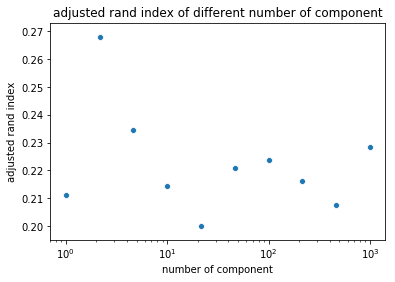

In [12]:
#(c) # Your Code goes here:
plt.figure()

ax = sns.scatterplot(x = components, y=scores)

plt.semilogx()

plt.xlabel('number of component')

plt.ylabel('adjusted rand index')

plt.title("adjusted rand index of different number of component")


plt.show()

(d) ***Your answer goes here:***
As can be seen from the figure, the effect is best when n_component is 2, and the effect is second when ARI is 0.268. When n_component is 4, the ARI is 0.234.The reduction in the dimensions of other values does not work better than when there is no reduction.


0.2680576185890075


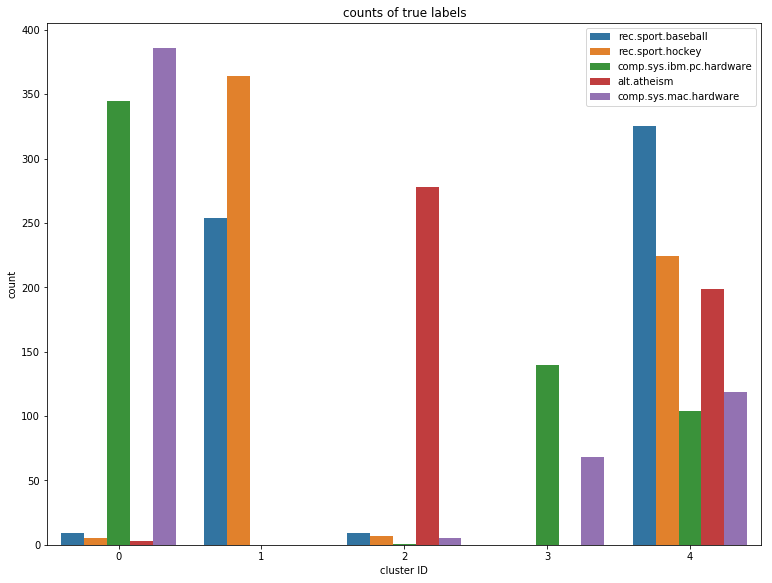

In [13]:
#(e) # Your Code goes here:
plt.figure(figsize=(12.8,9.6))

pca = PCA(n_components=2, random_state=1000)
pca_data = pca.fit_transform(X=X)
pca_kmeans = KMeans(n_clusters=5, random_state=1000)
pca_kmeans.fit(X=pca_data)
y_pca_pred = pca_kmeans.predict(pca_data)
pca_ARI = adjusted_rand_score(y,y_pca_pred)
print(pca_ARI)
sns.countplot(x=pca_kmeans.labels_, hue=y)
plt.xlabel("cluster ID")
plt.title("counts of true labels")
plt.legend(fontsize=10)
plt.show()

(f) ***Your answer goes here:***

The effect is getting better
As shown in the figure, the most confusing cluster is the fourth cluster (corresponding to the first cluster of question 2.3), we can see that the cluster's green and purple data is reduced, while the 0th cluster The green and purple data is increasing.

The red data (atheism) of the second cluster (corresponding to the fourth cluster of question 2.3) is increasing, while the blue and orange data is decreasing.

These all prove that the same kind of data (including the associated article) is more aggregated than the previous problem 2.3, so this effect is better than before.

### ========== Question 2.6 --- [16 marks] ==========

Another benefit of Dimensionality Reduction is that it allows us to visualise the data. That is, while we cannot visualise a 1000-feature space, we can pick the top two components and visualise those. We will do this by means of a [Voronoi Diagram](https://en.wikipedia.org/wiki/Voronoi_diagram), which we will use to analyse the cluster centres.

&nbsp;&nbsp;**(a)** [Text] By explaining what a Voronoi Diagram is, indicate why it is useful in visualising the extent (in space) of K-Means clusters?<br>
&nbsp;&nbsp;**(b)** [Code] Using the function `plot_voronoi` which we provided in the `utils` package, visualise the clusters in the two-dimensional PCA space (top two components). Mark each cluster centre, and visualise **some** (*Hint: sub-sample*) of the data points to give you an idea of where the true classes lie. Make sure that the key elements of the plot are clearly visible/discernible (you may need to tweak some parameters) and label clearly all necessary elements of the plot (color-coding, data points). *Tip: you may need to change y to a numeric value if using matplotlib rather than seaborn*.<br>
&nbsp;&nbsp;**(c)** [Text] What can you conclude from the plot as to the "classification-performance" of the K-Means classifier?

(a) ***Your answer goes here:***
Because there is a P point in each block in the graph, all the points in the block have less or equal distances than any other P in other block.
This is similar to K-Means, all points are finally classified to the shortest distance cluster

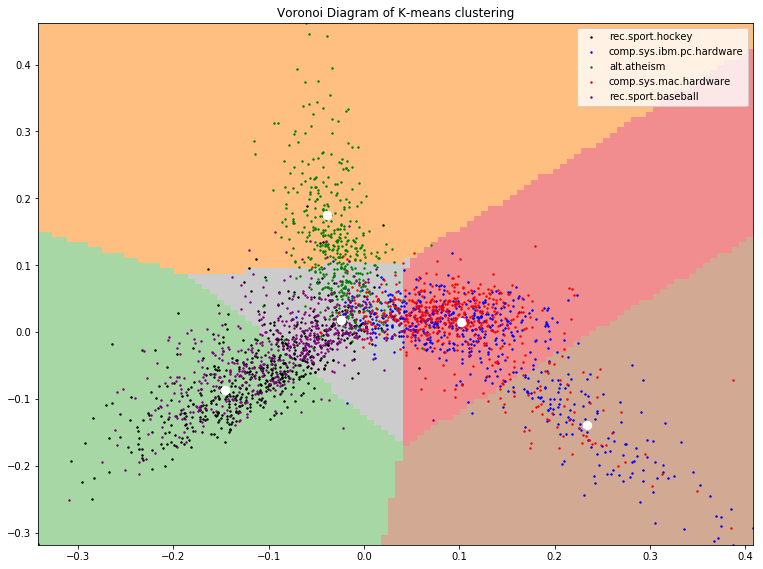

In [16]:
#(b) # Your Code goes here:
pca = PCA(n_components=2, random_state=1000)
pca_data = pca.fit_transform(X=X)
pca_kmeans = KMeans(n_clusters=5, random_state=1000)
pca_kmeans.fit(X=pca_data)

x_min, x_max = pca_data[:, 0].min(), pca_data[:, 0].max()
y_min, y_max = pca_data[:, 1].min(), pca_data[:, 1].max()

data_range = x_min,x_max,y_min,y_max

plt.figure(figsize=(6.4 * 2, 4.8 * 2))

plot = plot_voronoi(pca_kmeans,data_range)

colors = ['black','blue','green','red','purple']
labels = ['rec.sport.hockey','comp.sys.ibm.pc.hardware','alt.atheism','comp.sys.mac.hardware','rec.sport.baseball']
for color, label in zip(colors, labels):
    plt.scatter(pca_data[y == label, 0], pca_data[y == label, 1], color=color, label=label, s=2)

centroids = pca_kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],s=70,color='w', zorder=10)

plt.legend()

plt.title('Voronoi Diagram of K-means clustering')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

(c) ***Your answer goes here:***

As can be seen from the figure, most of the green points (atheism) are concentrated together,because atheism is independent and has no relevance to other classifications.Instead, black points (hockey) and purple points (baseball) are all gathered together because they are related. The same is true for the blue points (PC) and the red points (mac).Therefore, the K-Means classifier has a good effect on independent tags,but for related labels, the classification effect is not ideal. In general,the classification-performance of the K-Means classifier needs more improvement.